In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# Analyzing Accounts by Category

* In the previous notebook, I looked at like and comment data across all 29 accounts. As I was doing this analysis, a new question sparked in my mind. Does this data vary by the "type" of account. By type of account I mean if the Instagram user prescribes to certain dietary guidelines. To do this analysis I collected data in Excel based on each account's biography which lists if they follow any healthy diets. This section categorizes all the accounts into four distinct categories: vegan, plant-based, paleo, and "other". Other means that the account does not specify a dietary preference or restriction. I am going to look specifically at number of Followers to see if certain dietary constraints garner more Followers than others. 

In [13]:
insta_df = pd.read_csv('../data/Instagram_accounts.csv')

In [14]:
insta_df['likeCount'] = pd.to_numeric(insta_df['likeCount'],errors = 'coerce')

In [15]:
insta_df['pubDate'].iloc[[0,-1]]

0        2020-11-15T21:43:08.000Z
59258    2016-04-03T00:11:26.000Z
Name: pubDate, dtype: object

In [16]:
insta_df2 = pd.read_csv('../data/Instagram_excel.csv')

In [18]:
insta_df2['Followers_base'] = np.where(insta_df2['Followers'].str[-1] == 'k',1000,1000000)
insta_df2['Followers_num'] = insta_df2['Followers'].map(lambda x: x.lstrip('+-').rstrip('kM')).astype(float)*insta_df2['Followers_base']
insta_df2.drop(columns = ['Followers', 'Other', 'Followers_base'])

,Account,Notes,Followers_num
0,agathachidu,Other,14000.0
1,maddielymburner,Plant based,278000.0
2,healthyliciousvegan,Vegan,12000.0
3,pickuplimes,Plant based,614000.0
4,sweetpotatosoul,Vegan,178000.0
5,the_buddhist_chef,Vegan,305000.0
6,purelykaylie,Plant based,191000.0
7,pascalbaudar,Other,70000.0
8,plantifullybased,Plant based,224000.0
9,georginaburgess,Vegan,59000.0


This table has added qualitative columns to the original insta_df columns: 
 - `Notes`: categorizes each account by the dietary restriction 
 - `Other`: lists the profession of each person running the account 
 - `Follower_num`: strips the letter at the end of the Followers 
 
Now we can look at the statistics for each account based on the type of dietary restriction: paleo, plant based, and vegan, and unspecified 

# Vegan Instagram Accounts: 

In [40]:
vegan_df = insta_df2.loc[insta_df2["Notes"] == "Vegan"]

In [41]:
vegan_df

,Account,Followers,Notes,Other,Followers_base,Followers_num
2,healthyliciousvegan,12k,Vegan,Blogger,1000,12000.0
4,sweetpotatosoul,178k,Vegan,Blogger,1000,178000.0
5,the_buddhist_chef,305k,Vegan,author,1000,305000.0
9,georginaburgess,59k,Vegan,Blogger,1000,59000.0
11,thecuriouschickpea,68k,Vegan,Blogger,1000,68000.0
14,chocolatecoveredkatie,467k,Vegan,Blogger,1000,467000.0


In [42]:
vegan_df['Followers_num'].mean()

181500.0

There are six plant-based accounts. Across all six accounts that prescribe to veganism, they have an average of 181,500 Followers.

 # "Unspecified" Instagram accounts:
  - Other means that the account does not specify a dietary preference or restriction.

In [43]:
other_df = insta_df2.loc[insta_df2["Notes"] == "Other"]

In [44]:
other_df

,Account,Followers,Notes,Other,Followers_base,Followers_num
0,agathachidu,14k,Other,Health coach,1000,14000.0
7,pascalbaudar,70k,Other,Food artist and author,1000,70000.0
10,agipsyinthekitchen,118k,Other,Blogger,1000,118000.0
12,munchin.withmar,14k,Other,Blogger,1000,14000.0
13,chefpetergordon,24k,Other,Chef,1000,24000.0
15,minimalistbaker,2M,Other,Blogger,1000000,2000000.0
16,shutthekaleup,352k,Other,Blogger,1000,352000.0
17,choosingchia,312k,Other,Blogger,1000,312000.0
18,lizmoody,136k,Other,Journalist,1000,136000.0
19,cleanfooddirtycity,109k,Other,Blogger,1000,109000.0


In [45]:
other_df['Followers_num'].mean()

297618.75

There are sixteen accounts that do not specify their dietary restraints. Across all sixteen accounts with no specified dietary restriction, there are an average of 297,618 Followers.

# Paleo Instagram accounts:

In [46]:
paleo_df = insta_df2.loc[insta_df2["Notes"] == "Paleo"]
paleo_df

,Account,Followers,Notes,Other,Followers_base,Followers_num
22,nomnompaleo,482k,Paleo,Author,1000,482000.0


In [47]:
paleo_df['Followers_num'].mean()

482000.0

You'll notice this category only as one account. As a result, it is difficult to consider this a sample of the larger category. 

# Plant-based Instagram Accounts:

In [48]:
plantbased_df = insta_df2.loc[insta_df2["Notes"] == "Plant based"]
plantbased_df

,Account,Followers,Notes,Other,Followers_base,Followers_num
1,maddielymburner,278k,Plant based,Blogger,1000,278000.0
3,pickuplimes,614k,Plant based,Dietician,1000,614000.0
6,purelykaylie,191k,Plant based,Blogger,1000,191000.0
8,plantifullybased,224k,Plant based,Blogger,1000,224000.0
20,lonijane,382k,Plant based,Author,1000,382000.0
25,mynewroots,384k,Plant based,Nutritionist,1000,384000.0


In [49]:
plantbased_df['Followers_num'].mean()

345500.0

There are six plant-based accounts. Across all six, they have an average of 345,500 Followers.

# Merging two datasets– a comprehensive view: 
 - Now I am going to combine the insta_df which shows all posts for 29 accounts and insta_df2 which categorizes all 29 accounts by their dietary type. This will allow us to look at more than just follower data. Now we can see likes, comments, post URLs, pubDate, number of Followers, dietary preference and profession all in one spot. Unfortunately these comparisons are not telling as there are an inconsistent number of accounts per group and there is only one paleo user. 

In [50]:
combined_df = pd.merge(insta_df, insta_df2, left_on='username', right_on='Account ')
combined_df = combined_df.drop(columns = 'Account ')
combined_df

,postUrl,description,commentCount,likeCount,pubDate,username,Followers,Notes,Other,Followers_base,Followers_num
0,https://www.instagram.com/p/CGDGulUhetO/,just really happy &amp; grateful for life righ...,420.0,33088.0,2020-10-07T16:10:21.000Z,maddielymburner,278k,Plant based,Blogger,1000,278000.0
1,https://www.instagram.com/p/CGDGulThoKV/,just really happy &amp; grateful for life righ...,420.0,33088.0,2020-10-07T16:10:21.000Z,maddielymburner,278k,Plant based,Blogger,1000,278000.0
2,https://www.instagram.com/p/CFsMm1vBfA4/,Had the best week away in one of my favourite ...,138.0,32231.0,2020-09-28T18:39:12.000Z,maddielymburner,278k,Plant based,Blogger,1000,278000.0
3,https://www.instagram.com/p/CFsMm1tBvVA/,Had the best week away in one of my favourite ...,138.0,32231.0,2020-09-28T18:39:12.000Z,maddielymburner,278k,Plant based,Blogger,1000,278000.0
4,https://www.instagram.com/p/CFsMm1uBxx7/,Had the best week away in one of my favourite ...,138.0,32231.0,2020-09-28T18:39:12.000Z,maddielymburner,278k,Plant based,Blogger,1000,278000.0
...,...,...,...,...,...,...,...,...,...,...,...
54578,https://www.instagram.com/p/BD1Rv3bMZrW/,Feels like summer ☀️ #fruitlovers #hippielane,357.0,23297.0,2016-04-05T20:45:15.000Z,talinegabriel,480k,Other,Blogger,1000,480000.0
54579,https://www.instagram.com/p/BDypBjEMZvs/,Rainbow Sushi for breakfast 🍙☄✨ #sushilovers #...,239.0,14460.0,2016-04-04T20:10:56.000Z,talinegabriel,480k,Other,Blogger,1000,480000.0
54580,https://www.instagram.com/p/BDx5GYusZmw/,Does breakfast count? 🤔🙃☺️ #goals #hippielane,165.0,6563.0,2016-04-04T13:12:09.000Z,talinegabriel,480k,Other,Blogger,1000,480000.0
54581,https://www.instagram.com/p/BDwNpSpMZoq/,Strawberries &amp; Cream dreams 💞💫✨ #hippielane,552.0,32979.0,2016-04-03T21:33:12.000Z,talinegabriel,480k,Other,Blogger,1000,480000.0


In [51]:
combined_df.groupby('Notes')['Followers_num'].mean()

Notes
Other          444435.141906
Paleo          482000.000000
Plant based    330200.613900
Vegan          188405.729772
Name: Followers_num, dtype: float64

According to this data, paleo accounts have the most followers; however, I think this is an inaccurate statement to make as only 1 of the 29 accounts identified as paleo. We would need more data to say anything definitive about this.

In [52]:
combined_df.groupby('Notes')['likeCount'].mean()

Notes
Other          3824.781520
Paleo          1944.851723
Plant based    5830.157312
Vegan          2566.188540
Name: likeCount, dtype: float64

According to this data, plant-based accounts get the most likes and paleo accounts get the least amount of likes per post.

In [53]:
combined_df.groupby('Notes')['commentCount'].mean()

Notes
Other          104.014376
Paleo           73.654859
Plant based    110.320873
Vegan           68.050329
Name: commentCount, dtype: float64

According to this data, plant-based accounts get the most comments per post and vegan accounts get the least amount of comments per post. 

In [54]:
combined_df = combined_df.set_index(pd.to_datetime(combined_df['pubDate'],errors='coerce'))

Text(0.5, 1.0, 'Number of Posts per Type of Healthy Food Category in 2020')

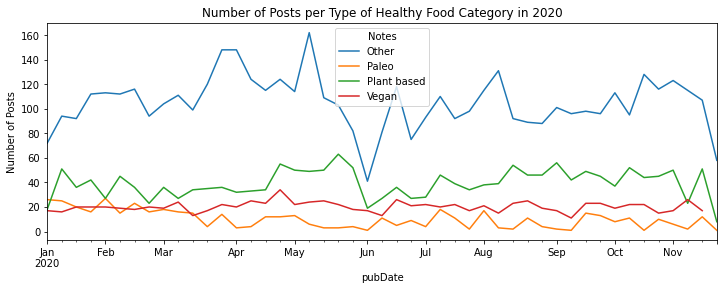

In [55]:
combined_df.loc['2020'].groupby('Notes').resample('W').size().unstack(0).plot(figsize=(12,4))
plt.ylabel('Number of Posts')
plt.title('Number of Posts per Type of Healthy Food Category in 2020')

This graph shows number of posts per week for each category in 2020. This models similar trends as what we have seen with for the aggregated average number of posts in 2020. The same trends apply: the number of posts varies and the dip in June corresponds with an allegiance to the "Black Lives Matter" Movement.

What makes this graph unique is that it is separated by "other" (blue), "paleo" (orange), "plant based" (green) and "vegan" (red). The "other" trend line is significantly higher than the rest which is likely because there are the most accounts in this category. Interestingly, the four lines follow similar dips and peaks. For example, May spikes, June declines, August peaks, and mid-October spikes. However, there is no conclusive reason or explanation for this association. 

Text(0.5, 1.0, 'Average Number of Likes per Type of Healthy Food Category in 2020')

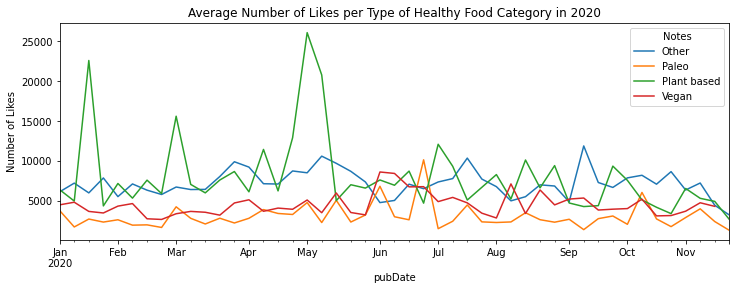

In [57]:
combined_df.loc['2020'].groupby('Notes').resample('W')['likeCount'].mean().unstack(0).plot(figsize=(12,4))
plt.ylabel('Number of Likes')
plt.title('Average Number of Likes per Type of Healthy Food Category in 2020')

This graph shows the average number of likes per post on a weekly basis for each category in 2020. Like the graph above each category has its own line: "other" (blue), "paleo" (orange), "plant based" (green) and "vegan" (red). There is not a concrete trends in this graph either– it fluctuates as most like graphs do. However, it is notable that plant-based accounts seem to have certain abnormal peaks in January, March and May. As previously noted, plant based accounts have the most average likes which explains these increases.

Text(0.5, 1.0, 'Average Number of Comments per Type of Healthy Food Category in 2020')

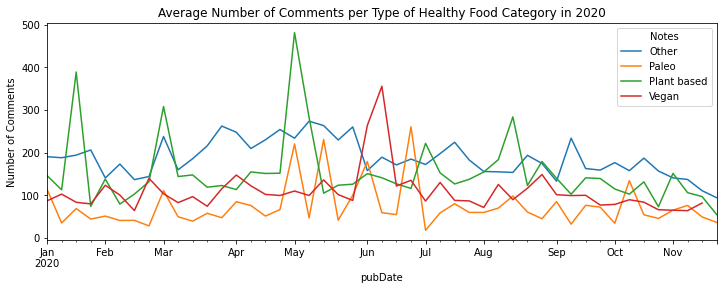

In [58]:
combined_df.loc['2020'].groupby('Notes').resample('W')['commentCount'].mean().unstack(0).plot(figsize=(12,4))
plt.ylabel('Number of Comments')
plt.title('Average Number of Comments per Type of Healthy Food Category in 2020')

Like the graph above each category has its own line: "other" (blue), "paleo" (orange), "plant based" (green) and "vegan" (red). This graph shows average comments over time for each type of account throughout 2020. For the sake of repetition– all this graphs fluctuates very open. Similar to what we see in the like count graph, plant-based accounts have the most average comments. Again, this means there is no right time post for comments. We see these spikes at certain months such as January, March, and May and August. 